In [1]:
import importlib_resources
import numpy as np
import pandas as pd

## Data loading

In [2]:
# Replace 'path_to_your_csv_file' with the actual path to your CSV file
filename = 'data/abalone.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

# Display the DataFrame
df.head()

,Sex,"""Length""","""Diameter""","""Height""","""Whole weight""","""Shucked weight""","""Viscera weight""","""Shell weight""","""Rings"""
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#remove the "" from the column names
df.columns = df.columns.str.replace('"', '')

#remove the whitespace from the column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [4]:
raw_data = df.values

cols = range(1, 9)
X = raw_data[:, cols]

print(X)

[[0.455 0.365 0.095 ... 0.101 0.15 15]
 [0.35 0.265 0.09 ... 0.0485 0.07 7]
 [0.53 0.42 0.135 ... 0.1415 0.21 9]
 ...
 [0.6 0.475 0.205 ... 0.2875 0.308 9]
 [0.625 0.485 0.15 ... 0.261 0.296 10]
 [0.71 0.555 0.195 ... 0.3765 0.495 12]]


In [5]:
attributeNames = np.asarray(df.columns[cols])

print(attributeNames)

['Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight' 'Rings']


In [ ]:
classLabels = raw_data[:, 0]

classNames = np.unique(classLabels)

classDict = dict(zip(classNames, range(len(classNames))))

print(classDict)

{'F': 0, 'I': 1, 'M': 2}


In [7]:
y = np.array([classDict[cl] for cl in classLabels])
print(y)

[2 2 0 ... 2 0 2]


In [8]:
N, M = X.shape
C = len(classNames)

N, M, C

(4177, 8, 3)

### PCA (without standarized data)

In [16]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [11]:
# Data attributes to be plotted
i = 0
j = 1

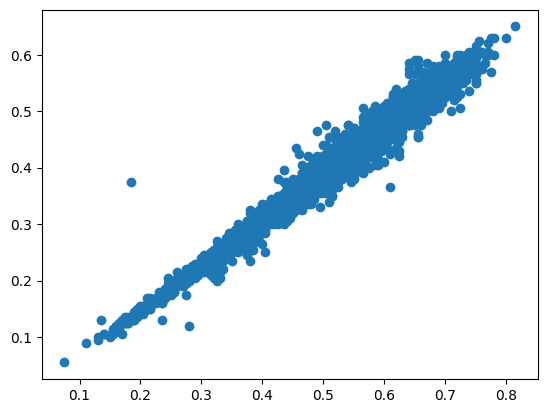

In [ ]:
# Make a simple plot of the i'th attribute against the j'th attribute (Lenght vs Diameter)
plt.plot(X[:, i], X[:, j], "o")

Text(0, 0.5, 'Diameter')

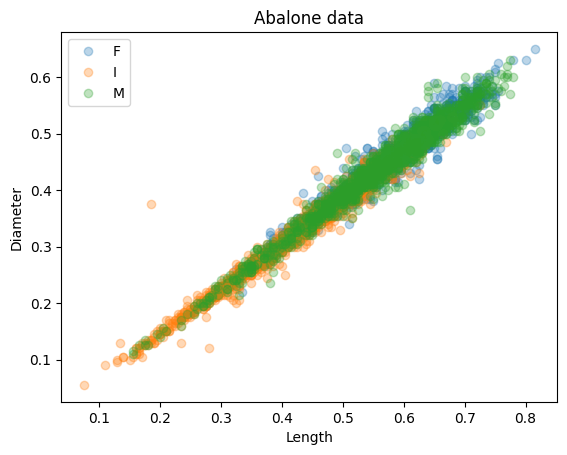

In [15]:
# Make another more fancy plot that includes legend, class labels,
# attribute names, and a title.
f = plt.figure()
plt.title("Abalone data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c 
    plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.3)

plt.legend(classNames)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])

 **PCA by computing SVD of Y**

In [18]:
X = np.array(X, dtype=np.float64)

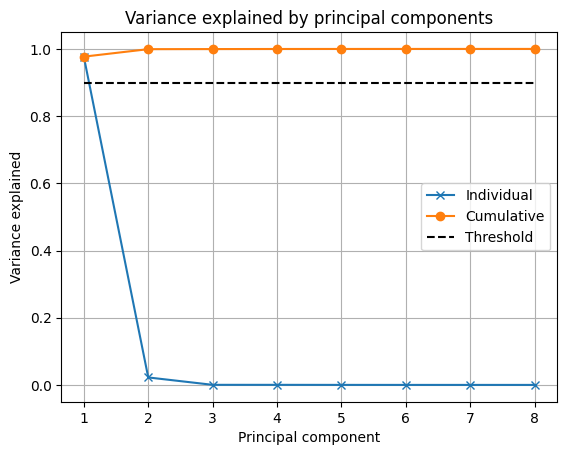

In [19]:
# Subtract mean value from data
# Note: Here we use Y to in teh book we often use X with a hat-symbol on top.
Y = X - np.ones((N, 1)) * X.mean(axis=0)

# Note: Here we call the Sigma matrix in the SVD S for notational convinience
U, S, Vh = svd(Y, full_matrices=False)

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Compute variance explained by principal components 
# Note: This is an important equation, see Eq. 3.18 on page 40 in the book.
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()


**ChatGPT interpretation**

✅ For Dimensionality Reduction → Keep only the first 1-2 principal components.

✅ For Visualization → A scatter plot of PC1 vs. PC2 should be very informative.

✅ For Further Validation → Ensure your data is standardized (mean = 0, std = 1) before applying PCA.

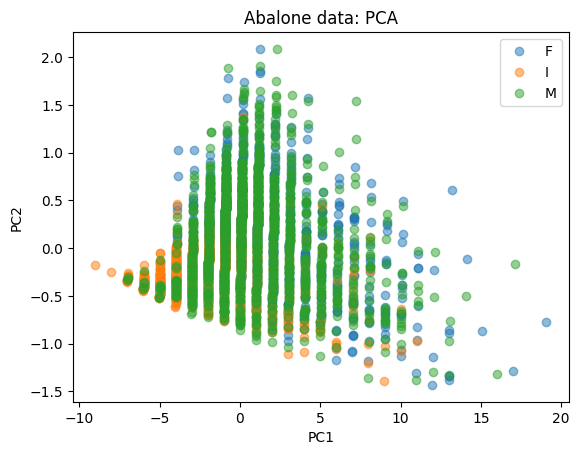

In [ ]:
# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted (PC1 and PC2)
i = 0
j = 1

# Plot PCA of the data
f = plt.figure()
plt.title("Abalone data: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()

There's overlap between the groups, specially between F and M

**Contributions of each feature in the PCs**

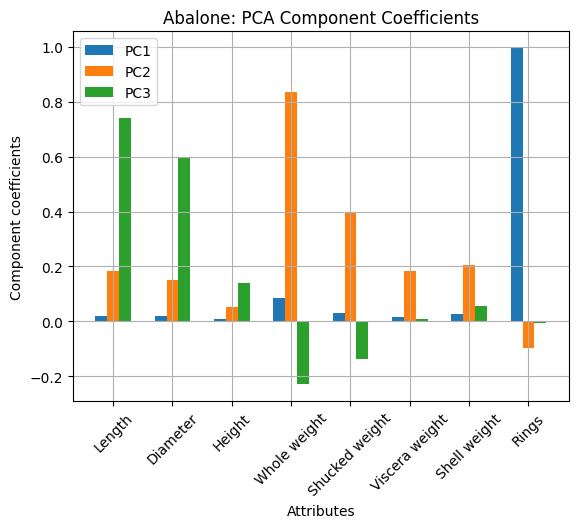

In [26]:
N, M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)

plt.xticks(r + bw,attributeNames, rotation = 45)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Abalone: PCA Component Coefficients")
plt.show()

